In [66]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('transaction.csv')

In [67]:
df['month'] = '' # tạo cột month
df.head()

,order_id,create_at,customer_id,city,channel,total_revenue,product_id,product_name,quantity,price,month
0,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000166,Pate Gói Chó Lớn Vị Gan Gà Nướng và Rau 130gr,1,19000,
1,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000168,Pate Gói Chó Lớn Vị Bò Rau Củ 130gr,1,19000,
2,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000165,Pate Gói Chó Lớn Vị Bò Nấu Sốt 130gr,1,19000,
3,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000164,Pate Gói Chó Lớn Vị Gà Bò Nấu Sốt 130gr,2,19000,
4,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000197,Sữa Dê Vị Gà Xé Phô Mai 70gr (vàng),1,28000,


In [87]:
df['month'] = df['create_at'].str[0:7] # cột month được cắt từ create_at

In [88]:
df['product_revenue'] = df['quantity']*df['price'] # tính doanh thu bán sản phẩm = số lượng * giá bán
df.head()

,order_id,create_at,customer_id,city,channel,total_revenue,product_id,product_name,quantity,price,month,revenue_by_product,product_revenue
0,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000166,Pate Gói Chó Lớn Vị Gan Gà Nướng và Rau 130gr,1,19000,2023-05,19000,19000
1,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000168,Pate Gói Chó Lớn Vị Bò Rau Củ 130gr,1,19000,2023-05,19000,19000
2,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000165,Pate Gói Chó Lớn Vị Bò Nấu Sốt 130gr,1,19000,2023-05,19000,19000
3,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000164,Pate Gói Chó Lớn Vị Gà Bò Nấu Sốt 130gr,2,19000,2023-05,38000,38000
4,HD002185,2023-05-31 21:20,KH000005,Hồ Chí Minh,KATWALK,188000,SP000197,Sữa Dê Vị Gà Xé Phô Mai 70gr (vàng),1,28000,2023-05,28000,28000


In [89]:
df.groupby('month').sum()['product_revenue'] # groupby revenue theo tháng

month
2022-05     42870500
2022-06     75738000
2022-07     60878500
2022-08     64231500
2022-09     63930000
2022-10     65756500
2022-11     76197000
2022-12     74251000
2023-01    128831000
2023-02     91746500
2023-03    139081400
2023-04     97048500
2023-05    141984300
Name: product_revenue, dtype: int64


**Find the month with the highest and lowest revenue**

In [90]:
revenue_by_month = df.groupby('month').sum()['product_revenue']

max_month = revenue_by_month.idxmax()
max_revenue = revenue_by_month[max_month]

min_month = revenue_by_month.idxmin()
min_revenue = revenue_by_month[min_month]
print(f"The month with the highest revenue is {max_month} with a revenue of {max_revenue}")
print(f"The month with the lowest revenue is {min_month} with a revenue of {min_revenue}")

The month with the highest revenue is 2023-05 with a revenue of 141984300
The month with the lowest revenue is 2022-05 with a revenue of 42870500



**Bar chart showing revenue by month**

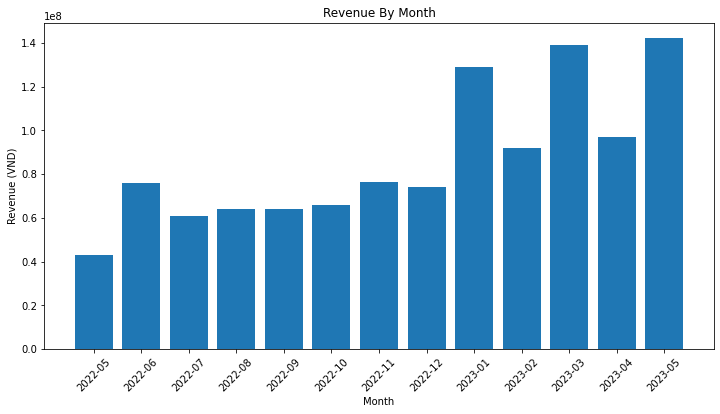

In [91]:
months = revenue_by_month.index
plt.figure(figsize=(12, 6)) # kích thước biểu đồ
plt.bar(x = months, height = revenue_by_month)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue (VND)')
plt.title('Revenue By Month')
plt.show()

**Find sales by city and create a bar chart to show it**

In [96]:
revenue_by_province = df.groupby('city').sum()['product_revenue'] # Nodata là những KH chưa có thông tin địa chỉ, tùy vào nhu cầu phân tích để loại bỏ hoặc giữ
revenue_by_province = revenue_by_province.sort_values(ascending=False)
print(revenue_by_province)

city
Hồ Chí Minh    743006700
Nodata         339706000
Đắk Nông        22138000
Hà Nội           3837000
Bình Dương       2375000
Bến Tre          1967000
Đà Nẵng          1465000
An Giang         1235000
Tây Ninh         1045000
Cà Mau            869000
Đồng Nai          787000
Lâm Đồng          734000
Đồng Tháp         630000
Hải Phòng         605000
Vũng Tàu          415000
Tiền Giang        404000
Nha Trang         363000
Kiên Giang        345000
Đắk Lắk           218000
Hưng Yên          150000
Long An           100000
Vĩnh Long         100000
Thái Nguyên        50000
Name: product_revenue, dtype: int64


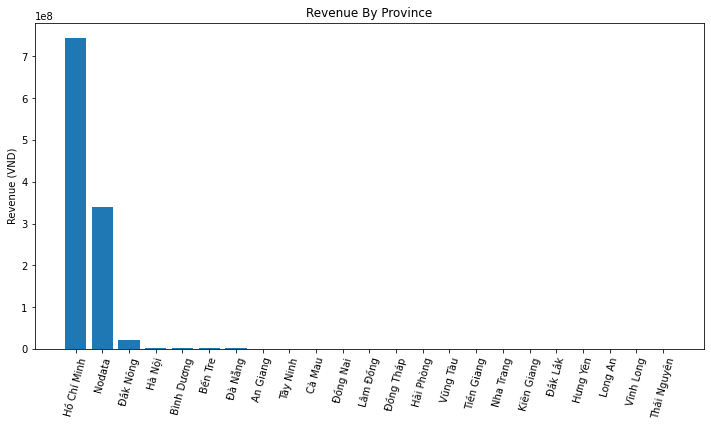

In [97]:
cities = revenue_by_province.index
plt.figure(figsize=(12, 6))
plt.bar(x = cities, height = revenue_by_province)
plt.xticks(rotation=75,size=10)
plt.ylabel('City')
plt.ylabel('Revenue (VND)')
plt.title('Revenue By Province')
plt.show()

**Find the number of orders by time of day and create a line chart to show it**

In [102]:
df['create_at'] = pd.to_datetime(df['create_at']) # định dạng dữ liệu
df['hours']=df['create_at'].dt.hour # tìm khung giờ từ create_at
df.head()

,order_id,create_at,customer_id,city,channel,total_revenue,product_id,product_name,quantity,price,month,revenue_by_product,product_revenue,hours
0,HD002185,2023-05-31 21:20:00,KH000005,Hồ Chí Minh,KATWALK,188000,SP000166,Pate Gói Chó Lớn Vị Gan Gà Nướng và Rau 130gr,1,19000,2023-05,19000,19000,21
1,HD002185,2023-05-31 21:20:00,KH000005,Hồ Chí Minh,KATWALK,188000,SP000168,Pate Gói Chó Lớn Vị Bò Rau Củ 130gr,1,19000,2023-05,19000,19000,21
2,HD002185,2023-05-31 21:20:00,KH000005,Hồ Chí Minh,KATWALK,188000,SP000165,Pate Gói Chó Lớn Vị Bò Nấu Sốt 130gr,1,19000,2023-05,19000,19000,21
3,HD002185,2023-05-31 21:20:00,KH000005,Hồ Chí Minh,KATWALK,188000,SP000164,Pate Gói Chó Lớn Vị Gà Bò Nấu Sốt 130gr,2,19000,2023-05,38000,38000,21
4,HD002185,2023-05-31 21:20:00,KH000005,Hồ Chí Minh,KATWALK,188000,SP000197,Sữa Dê Vị Gà Xé Phô Mai 70gr (vàng),1,28000,2023-05,28000,28000,21


In [104]:
df['hours']

0       21
1       21
2       21
3       21
4       21
        ..
9748     1
9749     1
9750    23
9751    23
9752    23
Name: hours, Length: 9753, dtype: int64

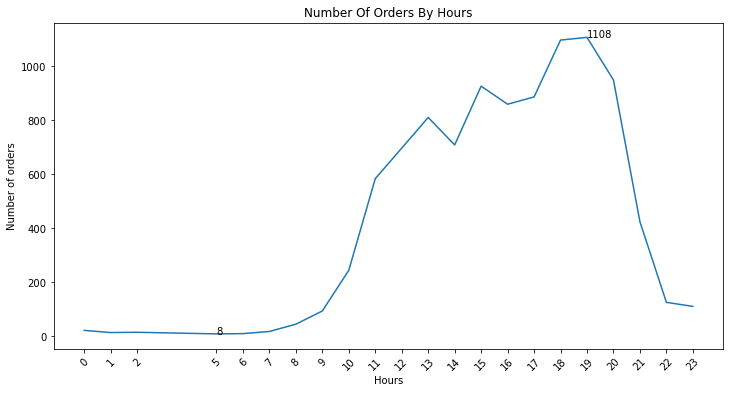

In [106]:
orders_by_hours = df.groupby('hours').count()['order_id']
Hours = orders_by_hours.index
plt.figure(figsize=(12, 6)) # kích thước của biểu đồ rộng 12 inch và cao 6 inch
plt.plot(Hours, orders_by_hours)
min_value = orders_by_hours.min()
max_value = orders_by_hours.max()
for x, y in zip(Hours, orders_by_hours): #duyệt qua các cặp giá trị (x, y) trong Hours và sales_by_hours
    if y == min_value or y == max_value: # ktra xem giá trị y có phải nhỏ nhất hoặc lớn nhất không
        plt.text(x, y, str(y)) # ktra đúng điều kiện thì hiển thị nhãn là y cho giá trị (x, y) trên biểu đồ
plt.xticks(Hours, rotation=45)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.title('Number Of Orders By Hours')
plt.show()

**Top 10 best-selling products**

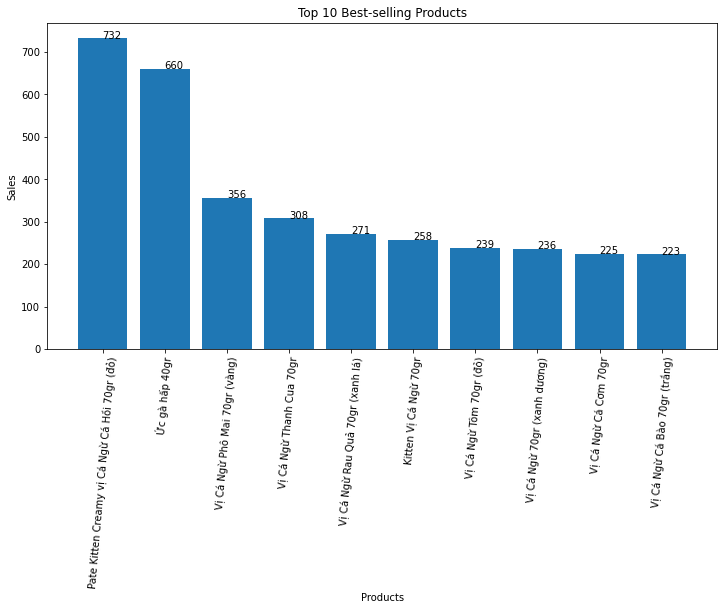

In [109]:
sales_by_products = df.groupby('product_name').sum()['quantity']
top_10_products = sales_by_products.nlargest(10)
products = top_10_products.index
plt.figure(figsize=(12, 6))
plt.bar(x = products, height = top_10_products)
for x, y in zip(products, top_10_products):
    plt.text(x, y, str(y))
plt.xticks(rotation=85,size=10)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Top 10 Best-selling Products')
plt.show()


**Find the number of orders by channel**

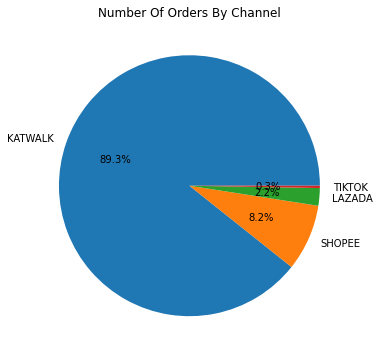

In [110]:
sales_by_channel = df.groupby('channel').count()['order_id']
sales_by_channel = sales_by_channel.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.pie(sales_by_channel, labels = sales_by_channel.index, autopct='%1.1f%%')
plt.title('Number Of Orders By Channel')
plt.show()